In [1]:
## Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
from math import sin, cos, sqrt, atan2, radians
import warnings

In [2]:
plantPop = pd.read_csv('../Data/plantPop_noDuplicates.csv')

In [3]:
plantPop.head(10)

,Unnamed: 0,Zip,City,State,Latitude,Longitude,2010 Census Population,"Distance from Arkansas Nuclear One, Unit 1",Distance from Beaver Valley Power Station 1,Distance from Braidwood Station 1,...,Distance from Sequoyah 1,Distance from South Texas 1,Distance from Summer,Distance from Surry 1,Distance from Susquehanna 1,Distance from Turkey Point 3,Distance from Vogtle 1,Distance from Waterford 3,Distance from Watts Bar 1,Distance from Wolf Creek 1
0,0,5769,Salisbury,VT,43.914026,-73.10703,1216,1964.516138,703.791569,1275.062906,...,1413.202932,2619.275755,1278.988498,816.682053,655.662688,2157.290611,1430.107582,2177.150254,1355.830978,1994.970315
1,1,1085,Westfield,MA,42.133642,-72.75029,41117,1926.478786,661.448479,1290.960391,...,1322.663768,2546.519449,1144.984973,656.426400,635.033811,1984.280764,1293.831261,2080.818508,1267.610472,1996.520992
2,2,1340,Colrain,MA,42.673371,-72.73104,1701,1945.702821,678.067625,1293.146763,...,1356.176314,2576.197606,1190.399368,708.057996,644.811577,2040.142885,1340.062884,2116.809863,1300.357427,2004.169739
3,3,26035,Colliers,WV,40.352943,-80.55585,2491,1245.246703,32.787622,656.163449,...,699.698547,1889.009288,675.234730,481.615397,113.903325,1655.585469,818.234170,1460.484573,640.926797,1327.964576
4,4,36279,Wellington,AL,33.862349,-85.89512,2645,692.507354,894.790543,845.288021,...,165.836320,1098.798820,427.275881,897.182914,966.988675,1069.953709,369.996463,609.421102,224.390980,1007.760155
5,5,37020,Bell Buckle,TN,35.616935,-86.39629,5036,621.263753,763.941229,644.833939,...,117.230643,1162.898159,487.721963,872.405145,828.373832,1262.474487,490.626073,731.620777,139.088096,879.017596
6,6,21787,Taneytown,MD,39.665171,-77.17264,10693,1495.684231,296.273334,954.119610,...,861.981723,2089.105923,698.702015,282.601872,327.377104,1608.829796,849.948325,1618.735749,807.801138,1612.386282
7,7,22560,Tappahannock,VA,37.916172,-76.90656,6704,1484.741059,427.323431,1040.113467,...,797.389097,2023.417680,561.891538,86.754916,482.882256,1424.838913,708.407024,1527.981516,750.005287,1647.366133
8,8,22812,Bridgewater,VA,38.398049,-79.00071,8927,1311.361851,276.497925,851.177582,...,653.606698,1882.772928,498.676195,236.411731,348.928537,1444.806156,650.026784,1407.550717,600.820710,1459.832103
9,9,21075,Elkridge,MD,39.197119,-76.75178,26344,1519.712436,351.222462,1002.791806,...,867.128290,2096.661209,677.204036,229.119977,387.908327,1566.224188,827.284438,1617.091974,814.848262,1649.559795


In [4]:
theEdges = np.arange(0, 500, 10)
theEdgesDF = pd.DataFrame(theEdges)
theEdgesDF
len(theEdges)

50

In [5]:
cols = plantPop.columns
colsDF = pd.DataFrame(cols)
thePlantNames = colsDF.loc[7:len(cols)]
thePlantNames.head(3)

,0
7,"Distance from Arkansas Nuclear One, Unit 1"
8,Distance from Beaver Valley Power Station 1
9,Distance from Braidwood Station 1


In [6]:
def binPops(df, plant, theEdgesDF):
    df.sort_values(by= plant,  inplace=True)
    secondLastVal = theEdges[-2]
    pop = []
    for index, row in theEdgesDF.iterrows():
        edge1 = theEdgesDF.loc[index][0]
        edge2 = theEdgesDF.loc[index+1][0]
        df2 = df[(df[plant] >= edge1) & (df[plant] <= edge2)]

        pop.append(df2['2010 Census Population'].sum())        

        if edge1 == secondLastVal:
            break

    
    return pop

In [7]:
binnedPop = pd.DataFrame()
for index, row in thePlantNames.iterrows():
    plantName = row[0]
    pop = binPops(plantPop, plantName, theEdgesDF)
    pop2 = pd.DataFrame(pop, columns=[plantName])
    binnedPop = pd.concat([binnedPop, pop2], axis=1)

In [8]:
binnedPopTranspose = binnedPop.transpose()

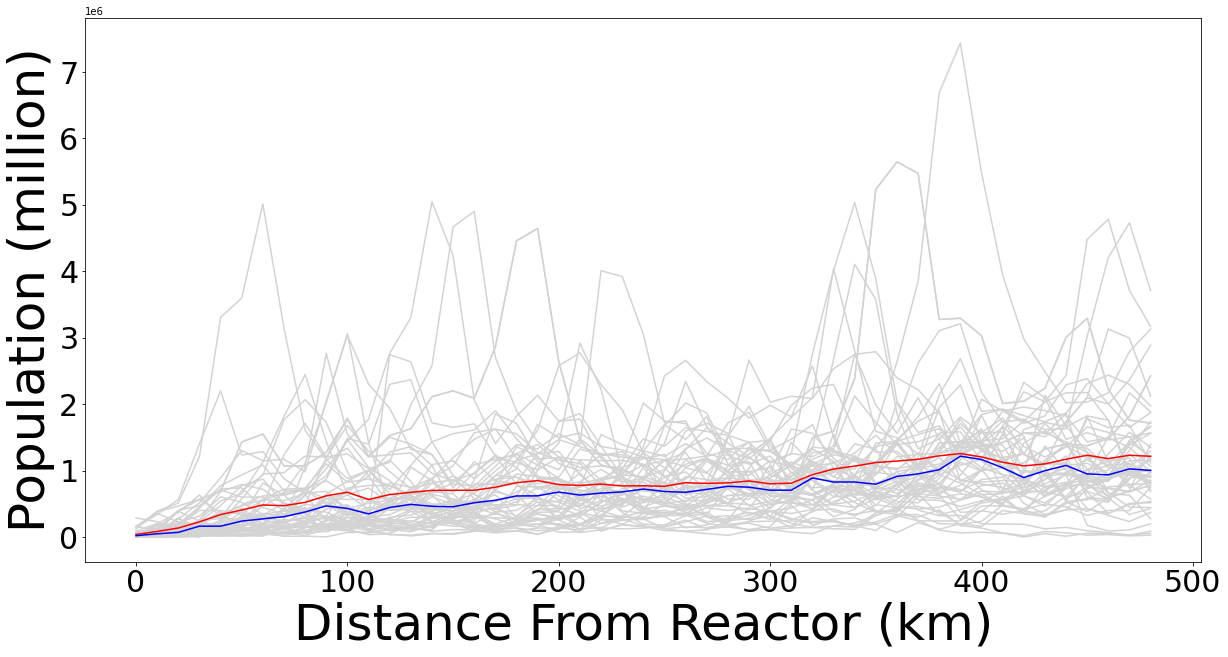

In [9]:
plt.figure(figsize=(20,10))

edgesForPlot = theEdges[:-1]
for index, rows in binnedPopTranspose.iterrows():
    rowData = rows[:].values
    plt.plot(edgesForPlot, rowData, color="lightgray") ;

binnedPop['Mean Pop'] = binnedPop.mean(axis=1)
binnedPop['StDev Pop'] = binnedPop.std(axis=1)
binnedPop['Median Pop'] = binnedPop.median(axis=1)

plt.plot(edgesForPlot, binnedPop['Mean Pop'], color="red") ;
plt.plot(edgesForPlot, binnedPop['Median Pop'], color="blue") ;
plt.xlabel("Distance From Reactor (km)", fontsize=50) ;
plt.ylabel("Population (million)", fontsize=50) ;
plt.xticks(fontsize=30) ;
plt.yticks(fontsize=30) ;
# plt.show()
plt.savefig('../Mark/allPopsPlot.jpg')

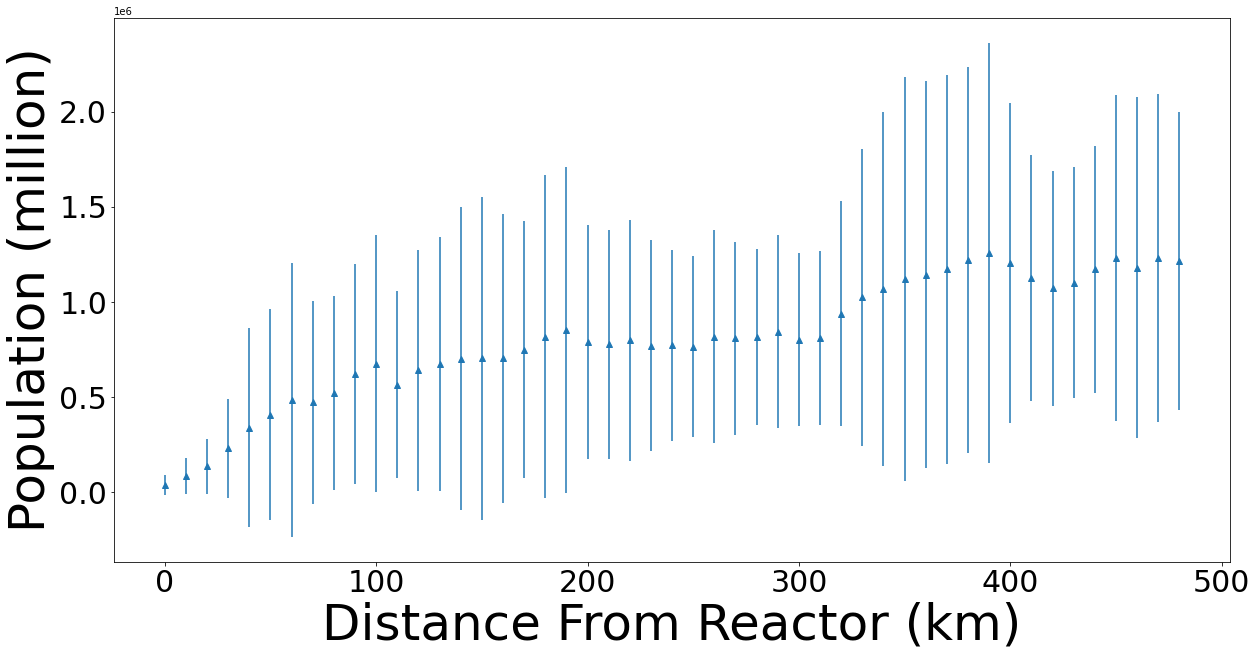

In [10]:
plt.figure(figsize=(20,10)) ;
plt.errorbar(edgesForPlot, binnedPop['Mean Pop'], binnedPop['StDev Pop'], linestyle='None', marker='^');
plt.xlabel("Distance From Reactor (km)");
plt.ylabel("Population")
plt.xlabel("Distance From Reactor (km)", fontsize=50) ;
plt.ylabel("Population (million)", fontsize=50) ;
plt.xticks(fontsize=30) ;
plt.yticks(fontsize=30) ;
# plt.show()
plt.savefig('../Mark/meanPopsPlot.jpg')

In [11]:
# save data
binnedPop.to_csv('../Data/binnedPop.csv')